# Ejercicio: Data input, output e iteración

En esta primera parte, aprenderemos a:

* Descargar ficheros y renombrarlos por comandos de Linux (mucho más eficiente que recurrir a librerías de Python). Esta será una práctica a la que nos iremos habituando a lo largo del curso.
* Leer y escribir ficheros en formato `csv` con la librería `pandas`.
* Iterar sobre las filas de un objeto `pd.DataFrame`.

En lo relativo a la primera parte, para la descarga emplearemos el comando `wget` seguido de la URL en cuestión. Para la segunda parte, usaremos la estructura `mv <source>  <destination>`:

```bash
# Descargamos un fichero csv
!wget https://www.stats.govt.nz/assets/Uploads/Gross-domestic-product/Gross-domestic-product-December-2021-quarter/Download-data/gross-domestic-product-December-2021-quarter-csv.csv
# Lo renombramos para que sea más sencillo acceder a él
!mv /content/gross-domestic-product-December-2021-quarter-csv.csv /content/dataset.csv
```

Cuando trabajamos en notebooks, es más cómodo guardar la URL como un enlace, y posteriormente la librería `pandas` se encarga por nosotros de importarlo:

In [1]:
# Descargamos un fichero csv
URL_data='https://www.stats.govt.nz/assets/Uploads/Gross-domestic-product/Gross-domestic-product-December-2021-quarter/Download-data/gross-domestic-product-December-2021-quarter-csv.csv'

Seguidamente, procedemos a leerlo:

In [2]:
# Librerías
import os
import pandas as pd
# Leemos archivo
df = pd.read_csv(URL_data)

<Axes: >

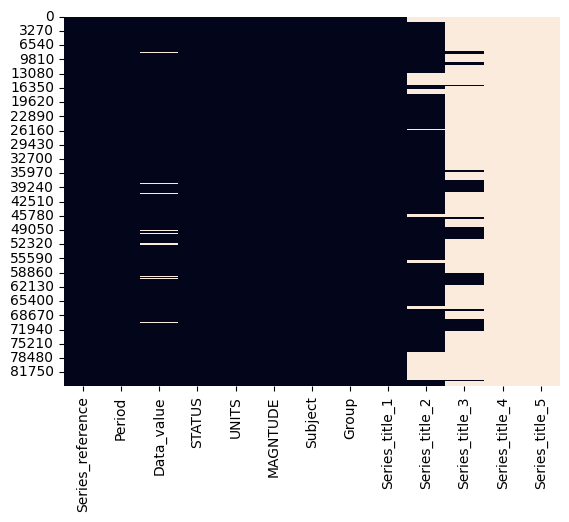

In [9]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False) 

In [ ]:
# Parece que la 4 y la 5 no tienen datos. Podemos eliminarlas
# La columna 3 tiene pocos datos, habría que ver cómo se arregla eso

In [8]:
df.shape # Para ver las filas y las variables

(85012, 13)

In [6]:
df.isnull().sum() # Podemos ver ahora que hay 1844 Data_value en 85012 filas, por ejemplo

Series_reference        0
Period                  0
Data_value           1844
STATUS                  0
UNITS                   0
MAGNTUDE                0
Subject                 0
Group                   0
Series_title_1          0
Series_title_2      13277
Series_title_3      70643
Series_title_4      85012
Series_title_5      85012
dtype: int64

In [7]:
df.isnull().sum().sum()

255788

In [4]:
df.columns # Hay que mirar si todas las columnas aportan, o hay índices duplicados

Index(['Series_reference', 'Period', 'Data_value', 'STATUS', 'UNITS',
       'MAGNTUDE', 'Subject', 'Group', 'Series_title_1', 'Series_title_2',
       'Series_title_3', 'Series_title_4', 'Series_title_5'],
      dtype='object')

Es conveniente hacer uso de la librería `os`, ya que a bajo nivel nos gestiona cuál es nuestro directorio activo actual (`os.getcwd()`) y nos permite fácilmente concatenar rutas para encontrar archivos (`os.path.join()`).

Veamos ahora cómo realizar iteraciones. En `pandas` existen esencialmente dos métodos para ello:

* `iterrows`: Enlace a [documentación](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iterrows.html).
* `itertuples`: Enlace a [documentación](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.itertuples.html).

Tu objetivo será analizar la documentación e implementar un bucle donde se itere sobre las filas del `DataFrame` dejando un sencillo `pass` dentro del bucle, con el decorador `%%timeit` para evaluar qué método es más rápido. A continuación se muestra un ejemplo:

```python
%%timeit
for elem in [1,2,3,4,5]:
    pass
```

* Método iterrows:

In [ ]:
%%timeit


1 loop, best of 5: 3.28 s per loop


*Tipo de respuesta esperada:*

```python
1 loop, best of 5: 3.28 s per loop
```

* Método `itertuples` por defecto:

In [ ]:
%%timeit


1 loop, best of 5: 117 ms per loop


*Tipo de respuesta esperada:*

```python
1 loop, best of 5: 117 ms per loop
```

* Método `itertuples` sin contener los índices:

In [ ]:
%%timeit


*Tipo de respuesta esperada:*

```python
10 loops, best of 5: 118 ms per loop
```

# Ejercicio Ecommerce

En este ejercicio, se proporcionan datos ficticios sobre compras realizadas por Amazon, por lo que es posible que exista alguna incoherencia en los datos. Se trata de ir realizando cada uno de los ejercicios propuestos progresivamente. Hay más de una forma de hacerlos, y todos se pueden responder con una línea.

El enlace es:

```python
URL_data = 'https://raw.githubusercontent.com/MatinMasimli/DataScience_ML_Udemy_Exercises/master/Ecommerce_purchases/Ecommerce%20Purchases.csv'
```

Cargamos la librería pandas como 'pd' y numpy como 'np':

In [10]:
import numpy as np
import pandas as pd

Ahora, leemos el DataFrame y mostramos sus cinco primeras filas:

In [11]:
URL_data = 'https://raw.githubusercontent.com/MatinMasimli/DataScience_ML_Udemy_Exercises/master/Ecommerce_purchases/Ecommerce%20Purchases.csv'

In [12]:
df = pd.read_csv(URL_data) 

In [ ]:
df2 = pd.DataFrame(pd.read_csv(URL_data)) # Para forzar que sea DataFrame

In [13]:
df.head() # Dentro de head le puedo especificar el num de muestras que quiero, por defecto son 5

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


¿Qué dimensiones tienen nuestros datos?

In [15]:
df.shape # Muestra las dimensiones (filas x columnas)

(10000, 14)

*Respuesta esperada:*

```python
(10000,14)
```

In [32]:
df.info() # Comando muy útil para ver las columnas y su tipo, y también se ven las filas (10000 entries) y columnas
          # object son strings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Address           10000 non-null  object 
 1   Lot               10000 non-null  object 
 2   AM or PM          10000 non-null  object 
 3   Browser Info      10000 non-null  object 
 4   Company           10000 non-null  object 
 5   Credit Card       10000 non-null  int64  
 6   CC Exp Date       10000 non-null  object 
 7   CC Security Code  10000 non-null  int64  
 8   CC Provider       10000 non-null  object 
 9   Email             10000 non-null  object 
 10  Job               10000 non-null  object 
 11  IP Address        10000 non-null  object 
 12  Language          10000 non-null  object 
 13  Purchase Price    10000 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


In [16]:
df.columns # Para ver los índices exactos de las columnas

Index(['Address', 'Lot', 'AM or PM', 'Browser Info', 'Company', 'Credit Card',
       'CC Exp Date', 'CC Security Code', 'CC Provider', 'Email', 'Job',
       'IP Address', 'Language', 'Purchase Price'],
      dtype='object')

¿Cuál es el precio medio de compra?

In [18]:
df['Purchase Price'].mean()

50.347302

In [33]:
# Otra manera
sum(df['Purchase Price']) / len(df['Purchase Price'])

50.34730200000025

*Respuesta esperada:*

```python
50.34730200000025
```

Cuáles fueron, respectivamente, los precios mayores y menores de compra?

In [34]:
df['Purchase Price'].max()
df['Purchase Price'].min()

0.0

In [22]:
print('\nPrecio mayor de la compra:\n{}'.format(df['Purchase Price'].max()))
print('\nPrecio menor de la compra:\n{}'.format(df['Purchase Price'].min()))


Precio mayor de la compra:
99.99

Precio menor de la compra:
0.0


*Respuesta esperada:*

```python
99.989999999999995
```

*Respuesta esperada:*

```python
0.0
```

In [42]:
df['Purchase Price'].isnull().sum() # Primero convendría asegurarnos que no hay nulos en la columna Purchase Price

0

In [43]:
df.duplicated().sum() # También conviene asegurarnos de que no hay información duplicada de la misma persona y mismo dinero

0

¿Cuánta gente tiene indicado como inglés (valor 'en') el idioma preferente?

In [44]:
# Primero nos aseguramos de que no hay valores nulos en la columna 'Language' 
df['Language'].isnull().sum() 

0

In [39]:
df[df['Language'] == 'en']['Language'].value_counts() # value.counts() se aplica directamente a una columna (serie) y no a un dataframe resultante de un filtro

en    1098
Name: Language, dtype: int64

In [68]:
df[df['Language'] == 'en'].shape[0]

1098

*Respuesta esperada:*

```python
1098
```

¿Cuánta gente dispone del título profesional `'Lawyer'`?


In [40]:
df[df['Job'] == 'Lawyer']['Job'].value_counts()

Lawyer    30
Name: Job, dtype: int64

In [65]:
df[df['Job'] == 'Lawyer'].count()

Address             30
Lot                 30
AM or PM            30
Browser Info        30
Company             30
Credit Card         30
CC Exp Date         30
CC Security Code    30
CC Provider         30
Email               30
Job                 30
IP Address          30
Language            30
Purchase Price      30
dtype: int64

In [66]:
df[df['Job'] == 'Lawyer']['Job'].shape[0]

30

In [67]:
df[df['Job'] == 'Lawyer']['Job'].info()

<class 'pandas.core.series.Series'>
Int64Index: 30 entries, 470 to 9979
Series name: Job
Non-Null Count  Dtype 
--------------  ----- 
30 non-null     object
dtypes: object(1)
memory usage: 480.0+ bytes


*Respuesta esperada:*

```python
30
```

¿Cuántas personas hicieron compras durante la mañana, y cuántas durante la tarde?

*(Pista: Use [value_counts()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html))*

In [48]:
df['AM or PM'].value_counts()

PM    5068
AM    4932
Name: AM or PM, dtype: int64

In [86]:
df['AM or PM'].value_counts(normalize=True) * 100 # Para sacar los porcentajes. Sin normalizar, saca los datos en bruto

PM    50.68
AM    49.32
Name: AM or PM, dtype: float64

*Respuesta esperada:*

```python
PM    5068
AM    4932
Name: AM or PM, dtype: int64
```

¿Cuáles son las cinco profesiones más habituales?

In [57]:
df['Job'].value_counts().nlargest(5)

Interior and spatial designer    31
Lawyer                           30
Social researcher                28
Purchasing manager               27
Designer, jewellery              27
Name: Job, dtype: int64

*Respuesta esperada:*

```python
Interior and spatial designer    31
Lawyer                           30
Social researcher                28
Purchasing manager               27
Designer, jewellery              27
Name: Job, dtype: int64
```

In [124]:
# Otra opción

df['Job'].value_counts().head(5)

Interior and spatial designer    31
Lawyer                           30
Social researcher                28
Purchasing manager               27
Designer, jewellery              27
Name: Job, dtype: int64

In [125]:
df['Job'].value_counts(normalize=True).nlargest(5) * 100 # Para ver los porcentajes

Interior and spatial designer    0.31
Lawyer                           0.30
Social researcher                0.28
Purchasing manager               0.27
Designer, jewellery              0.27
Name: Job, dtype: float64

Algún usuario hizo una compra que vino en el lote `90 WT`. ¿Cuál fue el precio de esa transacción?

In [82]:
df[df['Lot'] == '90 WT']['Purchase Price']

513    75.1
Name: Purchase Price, dtype: float64

*Respuesta esperada:*

```python
513    75.1
Name: Purchase Price, dtype: float64
```

In [162]:
df[df['Lot'] == '90 WT']['Purchase Price'].values[0] # Filtramos solo el valor

75.1

In [101]:
df.head(1)

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14


¿Cuál es el email de la persona con tarjeta de crédito `4926535242672853`?

In [171]:
df[df['Credit Card'] == 4926535242672853]['Email'] # Es importante no poner la tarjeta entre comillas, porque no es un string

1234    bondellen@williams-garza.com
Name: Email, dtype: object

*Respuesta esperada:*

```python
1234    bondellen@williams-garza.com
Name: Email, dtype: object
```

¿Cuánta gente tiene `American Express` como proveedor de crédito e hizo una compra superior a `$95`?

In [109]:
df.columns

Index(['Address', 'Lot', 'AM or PM', 'Browser Info', 'Company', 'Credit Card',
       'CC Exp Date', 'CC Security Code', 'CC Provider', 'Email', 'Job',
       'IP Address', 'Language', 'Purchase Price'],
      dtype='object')

In [117]:
df[df['CC Provider'] == 'American Express']['CC Provider'].value_counts() # Primero cuento todos los que tienen American Express

American Express    849
Name: CC Provider, dtype: int64

In [121]:
df[(df['CC Provider'] == 'American Express') & (df['Purchase Price']>95)]['CC Provider'].value_counts() # A esos les hago la condición de >95

American Express    39
Name: CC Provider, dtype: int64

In [123]:
df[(df['CC Provider'] == 'American Express') & (df['Purchase Price']>95)].shape[0] # Saco solo las filas que cumplen las dos condiciones

39

*Respuesta esperada:*

```python
39
```

¿Cuánta gente tiene una tarjeta de crédito que expira en 2025?

In [128]:
df.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


In [135]:
df[df['CC Exp Date'].str.endswith('/25')].shape[0]

1033

In [ ]:
# Otra forma
import datetime as dt # nos permite controlar el factor tiempo. Recomendable utilizar este formato siempre que tengamos fechas

df['CC Exp Date'] = pd.to_datetime(df['CC Exp Date'], format='%m/%y')


*Respuesta esperada:*

```python
1033
```

¿Cuáles fueron los cinco *email hosts* más populares (e.g., gmail, yahoo,...)?

In [137]:
df.head(1)

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14


In [159]:
df['Email'].str.split('@').str[1].value_counts().head()

hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: Email, dtype: int64

*Respuesta esperada:*

```python
hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: Email, dtype: int64
```